<a href="https://colab.research.google.com/github/vasudevan-gomathy/CaseStudy_LinearRegression/blob/main/CaseStudy_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Case Study - Ground Cricket Chrips


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [8]:
LR = linear_model.LinearRegression()
sound = df["Chirps/Second"]
temp = df[["Ground Temperature"]]
LR.fit(temp, sound)

LinearRegression()

1) The linear regression equation for this data

In [10]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(LR.coef_[0], LR.intercept_))

Linear Regression Equation: y = 0.2030 * x + 0.4593


2) Chart the original data and the equation on the chart.

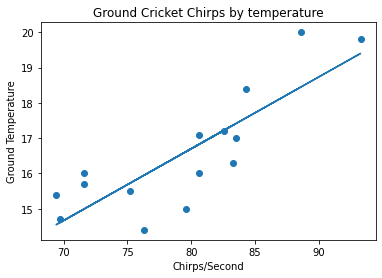

In [11]:
plt.scatter(temp, sound)
plt.plot(temp, LR.predict(temp))
plt.title('Ground Cricket Chirps by temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

3) Calculating R2

In [13]:
print('R2 score for this equation: {:.4f}'
      .format(LR.score(temp, sound)))

R2 score for this equation: 0.6923


4) If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [20]:
print('At 95˚F, our approximation of chirps/sec is: {:.4f}'
      .format(LR.predict([[95]])[0]))

At 95˚F, our approximation of chirps/sec is: 19.7443


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


5) What was the approximate ground temperature on a particular morning the crickets were chirping at a rate of 18 chirps per second.

In [21]:
def chirps_to_temp(y):
    reg = (y - LR.intercept_) / LR.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y, reg))
chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of 86.41˚F


# Case Study - Brain vs Body Weight

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [23]:
df1 = pd.read_fwf("/content/brain_body.txt")

In [24]:
df1.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


1) The linear regression equation for this data for brain weight to body weight.

In [26]:
LR1 = linear_model.LinearRegression()
X = df1[['Brain']]
y = df1['Body']
LR1.fit(X, y)

LinearRegression()

In [27]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(LR1.coef_[0], LR1.intercept_))

Linear Regression Equation: y = 0.9665 * x + 91.0044


2) Chart the original data and the equation on the chart.

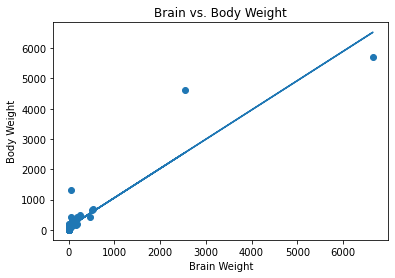

In [29]:
plt.scatter(X, y)
plt.plot(X, LR1.predict(X))
plt.title('Brain vs. Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

3) R2 Score

In [31]:
print('R2 score for this equation: {:.4f}'
      .format(LR1.score(X, y)))

R2 score for this equation: 0.8727


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [33]:
df2 = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [34]:
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


1) The linear regression equation for this data.

In [39]:
LR2 = linear_model.LinearRegression()
feat = ['Sex', 'Rank', 'Year',	'Degree',	'YSdeg']
feature = df2[feat]
target = df2['Salary']
LR2.fit(feature, target)

LinearRegression()

In [40]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(LR2.coef_[0], LR2.intercept_))

Linear Regression Equation: y = 1241.7925 * x + 11410.1465


2) R2 score

In [41]:
print('R2 score for this equation: {:.4f}'
      .format(LR2.score(X, y)))

R2 score for this equation: 0.8547


3) Finding whether sex is an important feature in predicting Salary

In [43]:
intercept = LR2.intercept_
coef = LR2.coef_

In [51]:
features = pd.DataFrame(coef, X.columns, columns = ['coefficient'])
features.coefficient = features.coefficient.abs()

In [52]:
# StandardDeviation
std = []

for i in X.columns:
  stds = df[i].std()
  std.append(stds)

In [54]:
features['std'] = np.array(std).reshape(-1, 1)
features['importance'] = features['std']*features['coefficient']
features['importance_normalized'] = 100*features['importance']/features['importance'].max()
features

,coefficient,std,importance,importance_normalized
Sex,1241.792500,0.447888,556.183485,11.546128
Rank,5586.181450,0.862316,4817.056428,100.000000
Year,482.859768,5.507536,2659.367706,55.207319
Degree,1331.644063,0.480384,639.701116,13.279917
YSdeg,128.790574,10.222340,1316.540995,27.330819


from the above table, we can see that sex has least importance over other feature in predicting the target "Salary".